In [3]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'     # TensorFlow logging suppression

!pip install -q transformers==4.40.0 torch pillow gtts tqdm

import warnings, logging
warnings.filterwarnings("ignore", category=Warning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

logging.getLogger("transformers").setLevel(logging.ERROR)
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.disable(logging.CRITICAL)

print("✅ All libraries installed and warnings silenced.")


✅ All libraries installed and warnings silenced.


In [4]:
import pandas as pd, textwrap, datetime
from pathlib import Path
DATA_DIR = Path("/content/excuse_data")
DATA_DIR.mkdir(exist_ok=True)
CSV_PATH = DATA_DIR/"excuses.csv"

# A tiny starter set – add as many rows as you like!
seed_rows = [
    # context, urgency (low/med/high), emotion, excuse
    ("work",   "high",  "formal",  "Severe migraine; doctor advised complete rest."),
    ("school", "low",   "casual", "Internet outage – couldn’t submit the assignment."),
    ("family", "med",   "empathy","Had to accompany grandma to her check‑up."),
    ("social", "med",   "humour", "My dog hid my car keys again – long story!"),
]
if not CSV_PATH.exists():
    pd.DataFrame(seed_rows, columns=["context","urgency","tone","excuse"]).to_csv(CSV_PATH,index=False)
df_excuse = pd.read_csv(CSV_PATH)
print("📄 Current dataset rows:", len(df_excuse))
df_excuse.head()


📄 Current dataset rows: 4


,context,urgency,tone,excuse
0,work,high,formal,Severe migraine; doctor advised complete rest.
1,school,low,casual,Internet outage – couldn’t submit the assignment.
2,family,med,empathy,Had to accompany grandma to her check‑up.
3,social,med,humour,My dog hid my car keys again – long story!


In [6]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch, numpy as np, random, re

MODEL_NAME = "gpt2"          # light, no API key
tokenizer   = AutoTokenizer.from_pretrained(MODEL_NAME)
gpt2        = AutoModelForCausalLM.from_pretrained(MODEL_NAME)
gpt2.eval().to("cpu")

def build_prompt(context, urgency, tone):
    few_shot = ""
    for _, row in df_excuse.sample(min(3, len(df_excuse))).iterrows():
        few_shot += f"Context:{row.context}|Urgency:{row.urgency}|Tone:{row.tone}\nExcuse:{row.excuse}\n\n"
    few_shot += f"Context:{context}|Urgency:{urgency}|Tone:{tone}\nExcuse:"
    return few_shot

@torch.no_grad()
def generate_excuse(context="work", urgency="low", tone="formal", max_len=40):
    prompt = build_prompt(context, urgency, tone)
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    out = gpt2.generate(
        input_ids,
        max_length=len(input_ids[0])+max_len,
        do_sample=True,
        top_p=0.92,
        temperature=0.9,
        pad_token_id=tokenizer.eos_token_id,
    )
    gen_text = tokenizer.decode(out[0], skip_special_tokens=True)
    # keep only after "Excuse:"
    excuse = gen_text.split("Excuse:")[-1].strip().split("\n")[0]
    return excuse

# 🔎 quick test
print("🧠 Generated:", generate_excuse("work","high","formal"))


🧠 Generated: I was walking down the street with my dog while my son was walking. I ran after him and told him to get back to my car. My son was also hiding my car keys. So I


🖼️ Saved fake chat screenshot: school_excuse.png


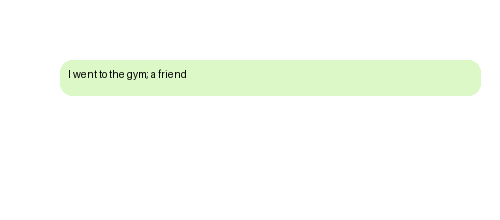

In [7]:
from PIL import Image, ImageDraw, ImageFont

CHAT_BG = (255,255,255)
BUBBLE_MY = (220,248,198)
FONT = ImageFont.load_default()

def make_chat_image(excuse_text, filename="chat_proof.png"):
    wrapped = textwrap.wrap(excuse_text, width=35)
    W, H = 500, 200 + 20*len(wrapped)
    img = Image.new('RGB', (W, H), CHAT_BG)
    draw = ImageDraw.Draw(img)
    # bubble
    bx1, by1, bx2, by2 = 60, 60, W-20, 60+20+15*len(wrapped)
    draw.rounded_rectangle([bx1,by1,bx2,by2], 12, fill=BUBBLE_MY)
    # text
    y = by1+8
    for line in wrapped:
        draw.text((bx1+8, y), line, font=FONT, fill=(0,0,0))
        y += 15
    img.save(filename)
    return filename

# 🔎 create proof for a new excuse
exc = generate_excuse("school","high","casual")
img_path = make_chat_image(exc, "school_excuse.png")
print("🖼️ Saved fake chat screenshot:", img_path)
Image.open(img_path)


🖼️ Saved fake chat screenshot: school_excuse.png


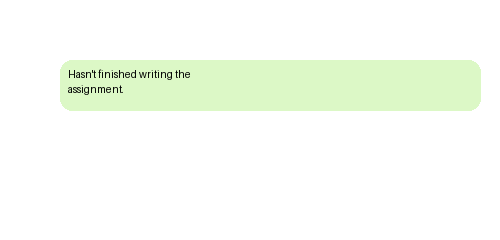

In [8]:
from PIL import Image, ImageDraw, ImageFont

CHAT_BG = (255,255,255)
BUBBLE_MY = (220,248,198)
FONT = ImageFont.load_default()

def make_chat_image(excuse_text, filename="chat_proof.png"):
    wrapped = textwrap.wrap(excuse_text, width=35)
    W, H = 500, 200 + 20*len(wrapped)
    img = Image.new('RGB', (W, H), CHAT_BG)
    draw = ImageDraw.Draw(img)
    # bubble
    bx1, by1, bx2, by2 = 60, 60, W-20, 60+20+15*len(wrapped)
    draw.rounded_rectangle([bx1,by1,bx2,by2], 12, fill=BUBBLE_MY)
    # text
    y = by1+8
    for line in wrapped:
        draw.text((bx1+8, y), line, font=FONT, fill=(0,0,0))
        y += 15
    img.save(filename)
    return filename

# 🔎 create proof for a new excuse
exc = generate_excuse("school","high","casual")
img_path = make_chat_image(exc, "school_excuse.png")
print("🖼️ Saved fake chat screenshot:", img_path)
Image.open(img_path)


🖼️ Saved fake chat screenshot: school_excuse.png


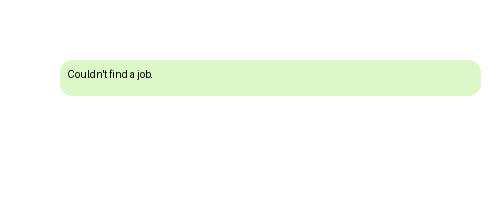

In [9]:
from PIL import Image, ImageDraw, ImageFont

CHAT_BG = (255,255,255)
BUBBLE_MY = (220,248,198)
FONT = ImageFont.load_default()

def make_chat_image(excuse_text, filename="chat_proof.png"):
    wrapped = textwrap.wrap(excuse_text, width=35)
    W, H = 500, 200 + 20*len(wrapped)
    img = Image.new('RGB', (W, H), CHAT_BG)
    draw = ImageDraw.Draw(img)
    # bubble
    bx1, by1, bx2, by2 = 60, 60, W-20, 60+20+15*len(wrapped)
    draw.rounded_rectangle([bx1,by1,bx2,by2], 12, fill=BUBBLE_MY)
    # text
    y = by1+8
    for line in wrapped:
        draw.text((bx1+8, y), line, font=FONT, fill=(0,0,0))
        y += 15
    img.save(filename)
    return filename

# 🔎 create proof for a new excuse
exc = generate_excuse("school","high","casual")
img_path = make_chat_image(exc, "school_excuse.png")
print("🖼️ Saved fake chat screenshot:", img_path)
Image.open(img_path)


In [10]:
HIST_PATH = DATA_DIR/"history.json"
if not HIST_PATH.exists():
    HIST_PATH.write_text("[]")

def fluency_score(text):
    ids = tokenizer.encode(text, return_tensors="pt")
    with torch.no_grad():
        loss = gpt2(ids, labels=ids).loss.item()
    return math.exp(loss)  # perplexity

def save_excuse(context, urgency, tone, excuse):
    hist = json.loads(HIST_PATH.read_text())
    entry = dict(ts=str(datetime.datetime.now()), context=context,
                 urgency=urgency, tone=tone, excuse=excuse,
                 score=fluency_score(excuse))
    hist.append(entry)
    HIST_PATH.write_text(json.dumps(hist, indent=2))
    return entry

def top_excuses(n=5):
    hist = json.loads(HIST_PATH.read_text())
    hist = sorted(hist, key=lambda x: x["score"])
    return pd.DataFrame(hist[:n])

# 🔎 generate & save one
e = generate_excuse("family","med","empathy")
save_excuse("family","med","empathy",e)
top_excuses()


,ts,context,urgency,tone,excuse,score
0,2025-05-20 17:31:40.043125,family,med,empathy,I was really scared this morning – not for a f...,13.85172


In [11]:
def emergency_send(contact_name, context="work", urgency="high", tone="formal"):
    excuse = generate_excuse(context, urgency, tone)
    save_excuse(context, urgency, tone, excuse)
    print(f"📨 Sending to {contact_name}:")
    print(excuse)
    # make proof
    fn = make_chat_image(excuse, f"proof_{int(time.time())}.png")
    print("Attached proof →", fn)

# 🔎 demo
emergency_send("Boss")


📨 Sending to Boss:
My friend's house was in bad condition.
Attached proof → proof_1747762353.png


In [12]:
%%writefile app.py
import streamlit as st, json, datetime, math, os
import pandas as pd, torch, textwrap
from transformers import AutoTokenizer, AutoModelForCausalLM
from PIL import Image, ImageDraw, ImageFont

tokenizer = AutoTokenizer.from_pretrained("gpt2")
gpt2 = AutoModelForCausalLM.from_pretrained("gpt2").to("cpu").eval()

def generate(context, urgency, tone):
    prompt = f"Context:{context}|Urgency:{urgency}|Tone:{tone}\nExcuse:"
    out = gpt2.generate(tokenizer(prompt, return_tensors="pt").input_ids,
                        max_length=50, do_sample=True, top_p=0.9, temperature=0.9,
                        pad_token_id=tokenizer.eos_token_id)
    return tokenizer.decode(out[0], skip_special_tokens=True).split("Excuse:")[-1].strip()

def make_chat(excuse):
    img = Image.new("RGB", (500,200), (255,255,255))
    draw = ImageDraw.Draw(img); FONT = ImageFont.load_default()
    draw.rounded_rectangle([60,60,480,160], 8, fill=(220,248,198))
    for i, line in enumerate(textwrap.wrap(excuse,35)):
        draw.text((70,70+i*15), line, font=FONT, fill=(0,0,0))
    fn = "chat.png"; img.save(fn); return fn

st.title("Intelligent Excuse Generator 🤖")
context = st.selectbox("Context", ["work","school","social","family"])
urgency  = st.selectbox("Urgency", ["low","med","high"])
tone     = st.selectbox("Tone", ["formal","casual","humour","empathy"])

if st.button("Generate Excuse"):
    ex = generate(context, urgency, tone)
    st.success(ex)
    fn = make_chat(ex)
    st.image(fn, caption="Proof")



Writing app.py
